# WeatherPy -- Original data

---

## Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config2 import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [72]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabou
Processing Record 2 of Set 1 | nadi
Processing Record 3 of Set 1 | touros
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | qaqortoq
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | opuwo
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | nuku'alofa
Processing Record 12 of Set 1 | alo
Processing Record 13 of Set 1 | espargos
City not found. Skipping...
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | saurimo
Processing Record 18 of Set 1 | nar'yan-mar
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | mana
Processing Record 21 of Set 1 | vodnyy
Processing Recor

Processing Record 40 of Set 4 | sopela
Processing Record 41 of Set 4 | hassi messaoud
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | khorixas
Processing Record 44 of Set 4 | qarazhal
Processing Record 45 of Set 4 | at taj
Processing Record 46 of Set 4 | ketchikan
Processing Record 47 of Set 4 | jardim
Processing Record 48 of Set 4 | kirkwall
Processing Record 49 of Set 4 | verkhniy tagil
Processing Record 0 of Set 5 | sulak
Processing Record 1 of Set 5 | golfito
Processing Record 2 of Set 5 | constantia
Processing Record 3 of Set 5 | amga
Processing Record 4 of Set 5 | vadso
Processing Record 5 of Set 5 | nogent-sur-seine
Processing Record 6 of Set 5 | fannuj
City not found. Skipping...
Processing Record 7 of Set 5 | vilyuchinsk
Processing Record 8 of Set 5 | qapqal
City not found. Skipping...
Processing Record 9 of Set 5 | povoa de santa iria
Processing Record 10 of Set 5 | lubumbashi
Processing Record 11 of Set 5 | pierre
Processing Record 12 of Set 5 | ban

Processing Record 31 of Set 8 | fale old settlement
Processing Record 32 of Set 8 | kununurra
Processing Record 33 of Set 8 | kani keli
Processing Record 34 of Set 8 | akureyri
Processing Record 35 of Set 8 | mananjary
Processing Record 36 of Set 8 | juchipila
Processing Record 37 of Set 8 | itoman
Processing Record 38 of Set 8 | bikenibeu village
Processing Record 39 of Set 8 | yulinshi
Processing Record 40 of Set 8 | san jose village
City not found. Skipping...
Processing Record 41 of Set 8 | thinadhoo
Processing Record 42 of Set 8 | gemeinde friedland
Processing Record 43 of Set 8 | konarka
Processing Record 44 of Set 8 | conception bay south
Processing Record 45 of Set 8 | east ballina
Processing Record 46 of Set 8 | papao
Processing Record 47 of Set 8 | broome
Processing Record 48 of Set 8 | hammerfest
Processing Record 49 of Set 8 | naze
Processing Record 0 of Set 9 | vadakku viravanallur
Processing Record 1 of Set 9 | twin falls
Processing Record 2 of Set 9 | badger
Processing R

Processing Record 21 of Set 12 | ijebu-ife
Processing Record 22 of Set 12 | rikaze
Processing Record 23 of Set 12 | crescent city
Processing Record 24 of Set 12 | kiffa
Processing Record 25 of Set 12 | rio grande
Processing Record 26 of Set 12 | pangody
Processing Record 27 of Set 12 | thandla
Processing Record 28 of Set 12 | raduzhnyy
Processing Record 29 of Set 12 | sarykemer
Processing Record 30 of Set 12 | kloulklubed
Processing Record 31 of Set 12 | zhalantun
Processing Record 32 of Set 12 | suva
Processing Record 33 of Set 12 | midvagur
Processing Record 34 of Set 12 | hobyo
Processing Record 35 of Set 12 | kurchatov
Processing Record 36 of Set 12 | kayangel
Processing Record 37 of Set 12 | nizhniy odes
Processing Record 38 of Set 12 | codrington
Processing Record 39 of Set 12 | idri
Processing Record 40 of Set 12 | yagry
City not found. Skipping...
Processing Record 41 of Set 12 | shenkursk
Processing Record 42 of Set 12 | ambon
Processing Record 43 of Set 12 | mount gambier
Pro

In [75]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [76]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      tabou   4.4230   -7.3528    298.59        88          76        0.70   
1       nadi -17.8000  177.4167    303.15        58          20        5.66   
2     touros  -5.1989  -35.4608    299.64        69          51        7.08   
3  adamstown -25.0660 -130.1015    294.44        69           0        4.72   
4   qaqortoq  60.7167  -46.0333    265.57        66          66        2.45   

  Country        Date  
0      CI  1700718129  
1      FJ  1700718129  
2      BR  1700718129  
3      PN  1700717928  
4      GL  1700718129

In [79]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                 
0            tabou   4.4230   -7.3528    298.59        88          76   
1             nadi -17.8000  177.4167    303.15        58          20   
2           touros  -5.1989  -35.4608    299.64        69          51   
3        adamstown -25.0660 -130.1015    294.44        69           0   
4         qaqortoq  60.7167  -46.0333    265.57        66          66   

         Wind Speed Country        Date  
City_ID                                  
0              0.70      CI  1700718129  
1              5.66      FJ  1700718129  
2              7.08      BR  1700718129  
3              4.72      PN  1700717928  
4              2.45      GL  1700718129

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [90]:

# Convert temperatures from Kelvin to Celsius and Fahrenheit
city_data_df['Max Temp Celsius'] = [temp - 273.15 for temp in city_data_df['Max Temp']]

# Create a scatter plot for latitude vs. temperature (in Celsius)
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp Celsius'], marker="o", color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent clipping of labels


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

In [93]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph propertie
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

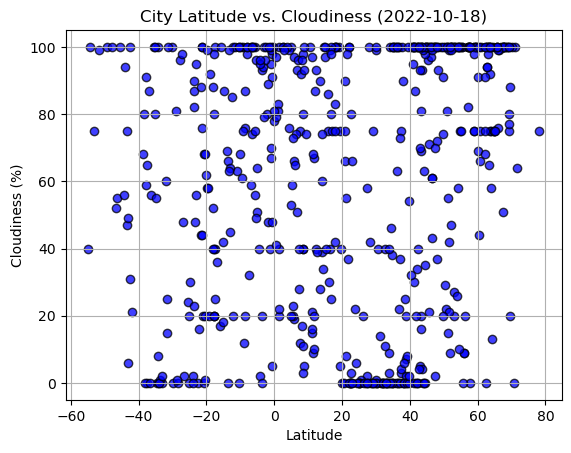

In [94]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [95]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", color="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [291]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y, xlabel, ylabel, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y)
    
    # Plot the regression line
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, "r-", label=f"y = {round(slope, 2)}x + {round(intercept, 2)}")

    # Annotate the line equation and r-value
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    r_value_annotation = f"r-value = {round(r_value, 2)}"
    
    # Print the r-value
    print(f"The r-value is: {r_value}")
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()


    # Show the plot
    plt.show()


In [97]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the new DataFrame
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                
0           tabou   4.4230   -7.3528    298.59        88          76   
4        qaqortoq  60.7167  -46.0333    265.57        66          66   
7          albany  42.6001  -73.9662    280.11        92         100   
8          anadyr  64.7500  177.4833    273.43        86          75   
10            alo   7.4178    6.7371    296.90        95          28   

         Wind Speed Country        Date  Max Temp Celsius  
City_ID                                                    
0              0.70      CI  1700718129             25.44  
4              2.45      GL  1700718129             -7.58  
7              0.89      US  1700718130              6.96  
8              8.00      RU  1700718055              0.28  
10             1.07      NG  1700718130             23.75

In [98]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                     
1                 nadi -17.8000  177.4167    303.15        58          20   
2               touros  -5.1989  -35.4608    299.64        69          51   
3            adamstown -25.0660 -130.1015    294.44        69           0   
5            grytviken -54.2811  -36.5092    274.41        93         100   
6                opuwo -18.0607   13.8400    300.55        27          52   
...                ...      ...       ...       ...       ...         ...   
558         codrington -38.2667  141.9667    291.22        67          80   
561              ambon  -3.6954  128.1814    306.23        62          20   
562      mount gambier -37.8333  140.7667    291.52        65          91   
566            malango  -2.9627  119.9001    304.12        47          79   
567         oranjemund -28.5500   16.4333    292.37        65           1   

         Wind Speed Country        Date  Max Temp Celsius  
City_ID                                                    
1              5.66      FJ  1700718129             30.00  
2              7.08      BR  1700718129             26.49  
3              4.72      PN  1700717928             21.29  
5              2.73      GS  1700718129              1.26  
6              2.51     NaN  1700718129             27.40  
...             ...     ...         ...               ...  
558            7.84      AU  1700718180             18.07  
561            4.12      ID  1700718180             33.08  
562            6.43      AU  1700718180             18.37  
566            2.56      ID  1700718181             30.97  
567            4.94     NaN  1700718012             19.22  

[174 rows x 10 columns]

###  Temperature vs. Latitude Linear Regression Plot

In [292]:
# Linear regression on Northern Hemisphere

northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the function for the northern hemisphere
linear_regression_plot(
    northern_hemisphere_df['Lat'],
    northern_hemisphere_df['Max Temp Celsius'],
    'Latitude',
    'Max Temp (°C)',
    'Linear Regression - Northern Hemisphere'
)


The r-value is: -0.8753171864502891


The r-value is: 0.6142637239739379


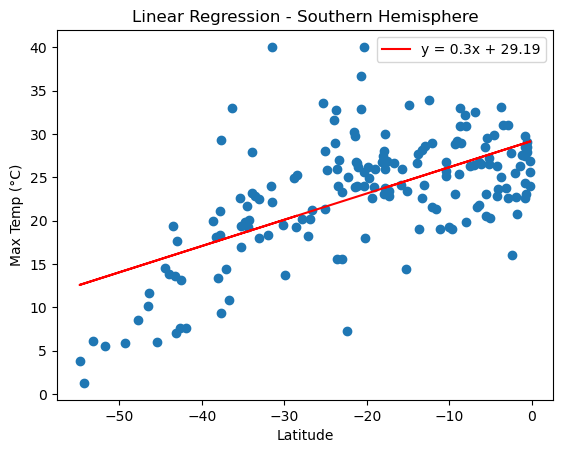

In [293]:
# Linear regression on Southern Hemisphere

southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the function for the southern hemisphere
linear_regression_plot(
    southern_hemisphere_df['Lat'],
    southern_hemisphere_df['Max Temp Celsius'],
    'Latitude',
    'Max Temp (°C)',
    'Linear Regression - Southern Hemisphere'
)

**Discussion about the linear relationship:** 

### Northern Hemisphere Insights:
In the Northern Hemisphere, a compelling trend emerges. As latitude increases, there is a noticeable decrease in Max Temperature. The linear regression equation y=−0.67x+33.81 reflects this negative correlation, with a slope of -0.67. The high absolute R-value of -0.87 further reinforces the strength of this negative correlation. Essentially, higher latitudes in the Northern Hemisphere are consistently associated with lower Max Temperatures.

## Southern Hemisphere Observations:
Conversely, the Southern Hemisphere exhibits a different temperature relationship with latitude. Here, an increase in latitude corresponds to an increase in Max Temperature. The linear regression equation y=0.3x+29.19 illustrates this positive correlation, featuring a slope of 0.3. While the positive correlation is moderate, as indicated by the R-value of 0.61, it underscores that higher latitudes in the Southern Hemisphere tend to be associated with higher Max Temperatures.

### Humidity vs. Latitude Linear Regression Plot

In [297]:
# Northern Hemisphere

northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the function for the northern hemisphere
linear_regression_plot(
    northern_hemisphere_df['Lat'],
    northern_hemisphere_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Linear Regression - Humidity vs. Latitude'
)


The r-value is: 0.2626492879035876


The r-value is: 0.11849720291164971


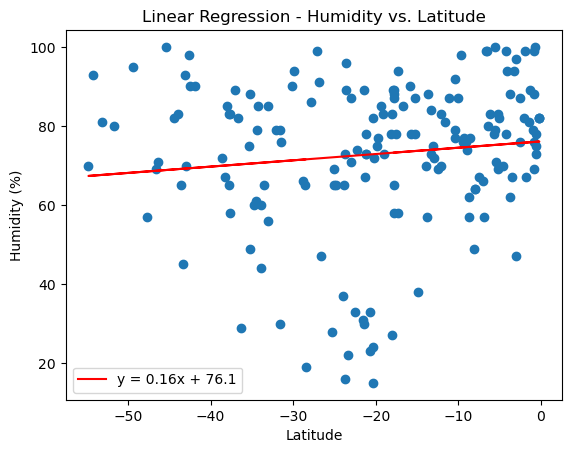

In [296]:
# Southern Hemisphere

southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the function for the southern hemisphere
linear_regression_plot(
    southern_hemisphere_df['Lat'],
    southern_hemisphere_df['Humidity'],
    'Latitude',
    'Humidity (%)',
    'Linear Regression - Humidity vs. Latitude'
)

**Discussion about the linear relationship:** 

### Northern Hemisphere Analysis:

The linear regression analysis for the Northern Hemisphere explores the connection between latitude (x) and humidity (y). The equation y=0.3x+60.67 signifies a positive correlation, suggesting that as one moves towards higher latitudes, humidity levels tend to increase. However, the relatively low R-value of 0.26 indicates a weak correlation. This implies that latitude alone has limited explanatory power in predicting humidity variations in the Northern Hemisphere. Other geographical and atmospheric factors, such as proximity to bodies of water or local weather patterns, likely contribute to the observed variations in humidity.

### Southern Hemisphere Analysis:

Turning our focus to the Southern Hemisphere, the linear regression equation y=0.16x+76.1 depicts a positive correlation between latitude and humidity. In the Southern Hemisphere, higher latitudes correspond to higher humidity levels, although the correlation is weak, as indicated by the R-value of 0.11. This suggests that latitude alone does not provide a strong predictive measure for humidity in the Southern Hemisphere. Additional factors such as prevailing wind patterns, proximity to oceans, and local climatic conditions may play pivotal roles in influencing humidity levels.
Comparative Analysis:

Comparing the two hemispheres, both exhibit positive correlations between latitude and humidity, indicating a general trend of increasing humidity with higher latitudes. However, similar to the temperature analysis, the correlation is notably stronger in the Northern Hemisphere (R-value = 0.26) compared to the Southern Hemisphere (R-value = 0.11). These results emphasize the multifaceted nature of humidity dynamics, where latitude serves as an indicator but is not the sole determinant. Local environmental factors play crucial roles in shaping humidity patterns in both hemispheres, contributing to the observed variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24492197393826376


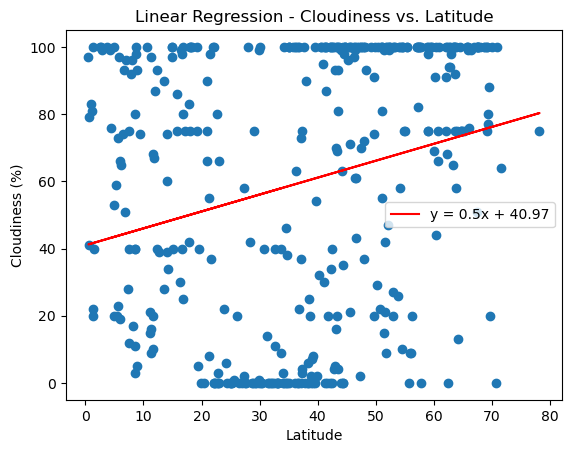

In [302]:
# Northern Hemisphere

northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the function for the northern hemisphere
linear_regression_plot(
    northern_hemisphere_df['Lat'],
    northern_hemisphere_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Linear Regression - Cloudiness vs. Latitude'
)


In [299]:
# Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the function for the southern hemisphere
linear_regression_plot(
    southern_hemisphere_df['Lat'],
    southern_hemisphere_df['Cloudiness'],
    'Latitude',
    'Cloudiness (%)',
    'Linear Regression - Cloudiness vs. Latitude'
)

The r-value is: 0.18273551169415186


**Discussion about the linear relationship:** 

### Northern Hemisphere Analysis:

Exploring the relationship between cloudiness and latitude in the Northern Hemisphere, the linear regression equation y=0.5x+40.97 suggests a positive correlation. This indicates that, on average, cloudiness tends to increase as one moves towards higher latitudes. The R-value of 0.24 suggests a very weak positive correlation, implying that latitude explains a portion of the variability in cloudiness, although to a limited extent. The very weak correlation suggests that factors beyond latitude, such as local weather patterns and geographical features, significantly influence cloudiness in the Northern Hemisphere.

### Southern Hemisphere Analysis:

In the Southern Hemisphere, the linear regression equation y=0.46x+68.54 illustrates a positive correlation between cloudiness and latitude. In the Southern Hemisphere, there is a tendency for increased cloudiness as one moves towards higher latitudes. However, the lower R-value of 0.18 indicates a weaker correlation compared to the Northern Hemisphere. This weaker correlation suggests that latitude alone is not a robust predictor of cloudiness in the Southern Hemisphere, and additional regional factors likely contribute substantially to cloudiness variations.
Comparative Analysis:

Comparing the two hemispheres, both exhibit positive correlations between latitude and cloudiness, indicating a general trend of increased cloudiness with higher latitudes. Nevertheless, the correlation is notably more pronounced in the Northern Hemisphere (R-value = 0.24) compared to the Southern Hemisphere (R-value = 0.18). These results underscore the influence of local climatic and geographical factors in shaping cloudiness patterns. While latitude serves as a useful indicator, it is evident that other regional variables significantly contribute to cloudiness variations in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2677430347735216


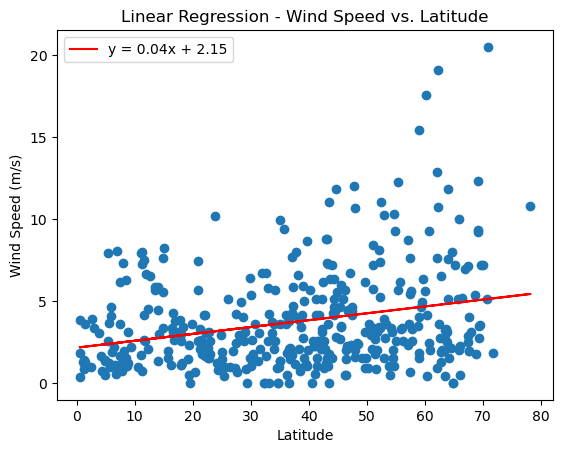

In [304]:
# Northern Hemisphere

northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Call the function for the northern hemisphere
linear_regression_plot(
    northern_hemisphere_df['Lat'],
    northern_hemisphere_df['Wind Speed'],
    'Latitude',
    'Wind Speed (m/s)',
    'Linear Regression - Wind Speed vs. Latitude'
)


The r-value is: -0.2831101643975921


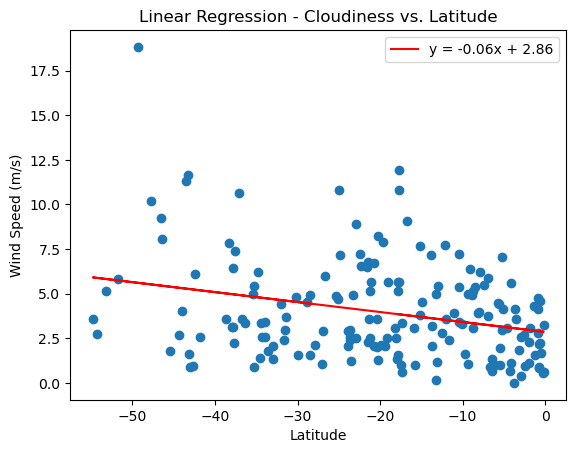

In [305]:
# Southern Hemisphere

southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Call the function for the southern hemisphere
linear_regression_plot(
    southern_hemisphere_df['Lat'],
    southern_hemisphere_df['Wind Speed'],
    'Latitude',
    'Wind Speed (m/s)',
    'Linear Regression - Cloudiness vs. Latitude'
)

**Discussion about the linear relationship:** 

### Northern Hemisphere Analysis:

Examining the relationship between wind speed and latitude in the Northern Hemisphere, the linear regression equation y=0.04x+2.15 suggests a positive correlation. This implies that, on average, wind speed tends to increase slightly as one moves towards higher latitudes. The R-value of 0.26 indicates a very weak positive correlation, implying that latitude explains a limited proportion of the variability in wind speed. The very weak correlation suggests that other factors, such as local topography and weather patterns, likely contribute significantly to variations in wind speed in the Northern Hemisphere.

### Southern Hemisphere Analysis:

In the Southern Hemisphere, the linear regression equation y=−0.06x+2.86 illustrates a negative correlation between wind speed and latitude. This indicates that there is a tendency for decreased wind speed as one moves towards higher latitudes. However, the lower R-value of -0.2 indicates a weak negative correlation. This weaker correlation implies that latitude alone is not a strong predictor of wind speed in the Southern Hemisphere, and additional regional factors play substantial roles in influencing wind speed variations.

Comparing the two hemispheres, both exhibit correlations between latitude and wind speed, but the relationships are notably weak. In the Northern Hemisphere, the correlation is weakly positive (R-value = 0.26), suggesting a slight increase in wind speed with higher latitudes. In the Southern Hemisphere, the correlation is weakly negative (R-value = -0.2), indicating a slight decrease in wind speed with higher latitudes. These findings emphasize the complexity of factors influencing wind speed, with latitude serving as only a modest indicator. It is evident that local geographic and atmospheric conditions contribute significantly to wind speed variations in both hemispheres.